## Interesting Facts<a name="toc"></a>
Data analysis of some interesting facts to demonstrate quantitative research<br>
[Setup](#setup)<br>
[Read Data](#read_data)<br>

### Set-Up<a name="setup"></a>
[Top](#toc)<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

### Read Data<a name="read_data"></a>
[Top](#toc)<br>

In [2]:
def repl_MnB(value: str) -> float:
    if isinstance(value, str):
        if value[-1:] == 'M':
            return float(value[:-1]) * 1000
        elif value[-1:] == 'B':
            return float(value[:-1]) * 1000000
    else:
        return value

    
def clean_pct(value: str) -> float:
    if isinstance(value, str):
        if value[-1:] == '%':
            if value[-2:-1] == 'k':
                return float(value[:-2]) * 1000
            else:
                return float(value[:-1])
    else:
        return value

    
def clean_space(value: str):
    if isinstance(value, str):
        return None
    else:
        return value

In [3]:
df = pd.read_excel('InterestingFacts.xlsx', usecols='A:Q', skiprows=[1,2])
MnB_cols = ['C&CE LF', 'CFO:CQ-4 T12M', 'Revenue:CQ-4 T12M', 'Cash fr Invstg:CQ-4 T12M', 'Tot Assets:Q-4',
            'LT Brrwng:Q-4', 'ST Brrwng:Q-4']
for col in MnB_cols:
    df[col] = df[col].apply(repl_MnB)
Pct_cols = ['Adj EPS Surp % LF', 'GAAP EPS Surp % LF']
for col in Pct_cols:
    df[col] = df[col].apply(clean_pct)
space_cols = ['Rec Consensus', 'BEst Rec 6Mo', 'Diluted EPS:CQ-4 T12M', 'Total Return:Y-1']
for col in space_cols:
    df[col] = df[col].apply(clean_space)
df['Rec Consensus'].replace(regex=' +', value=None, inplace=True)
df['Diluted EPS:CQ-4 T12M'].replace(regex=' +', value=None, inplace=True)
df['Total Return:Y-1'].replace(regex=' +', value=None, inplace=True)
df.head()

,Ticker,Name,ARD Ref Diluted EPS,C&CE LF,Adj EPS Surp % LF,GAAP EPS Surp % LF,Rec Consensus,BEst Rec 6Mo,GICS Ind Grp Name,Diluted EPS:CQ-4 T12M,Total Return:Y-1,CFO:CQ-4 T12M,Revenue:CQ-4 T12M,Cash fr Invstg:CQ-4 T12M,Tot Assets:Q-4,LT Brrwng:Q-4,ST Brrwng:Q-4
0,DATA US Equity,TABLEAU SOFTWARE INC-CL A,,639250.0,33.96,67.62,3.90,None,Software & Services,-2.36,73.41,226870.0,877060.0,-461960.0,1320000.0,0.0,0.0
1,RLGY US Equity,REALOGY HOLDINGS CORP,,226000.0,-8.89,-11.04,2.71,None,Real Estate,3.16,-43.68,667000.0,6110000.0,-148000.0,7520000.0,3230000.0,476000.0
2,NWSA US Equity,NEWS CORP - CLASS A,,1890000.0,269.57,142.86,3.25,None,Media & Entertainment,-0.77,-28.99,697000.0,8300000.0,-163000.0,14660000.0,281000.0,105000.0
3,ZAYO US Equity,ZAYO GROUP HOLDINGS INC,,353900.0,-32.43,-31.82,4.67,None,Telecommunication Services,0.34,-37.93,963800.0,2490000.0,-2240000.0,8860000.0,5630000.0,12800.0
4,CDW US Equity,CDW CORP/DE,,255100.0,6.29,11.94,4.30,None,Technology Hardware & Equipment,3.34,17.96,777700.0,14920000.0,-81100.0,7100000.0,3390000.0,41500.0


In [4]:
df.dtypes

Ticker                       object
Name                         object
ARD Ref Diluted EPS          object
C&CE LF                     float64
Adj EPS Surp % LF           float64
GAAP EPS Surp % LF          float64
Rec Consensus               float64
BEst Rec 6Mo                 object
GICS Ind Grp Name            object
Diluted EPS:CQ-4 T12M       float64
Total Return:Y-1            float64
CFO:CQ-4 T12M               float64
Revenue:CQ-4 T12M           float64
Cash fr Invstg:CQ-4 T12M    float64
Tot Assets:Q-4              float64
LT Brrwng:Q-4               float64
ST Brrwng:Q-4               float64
dtype: object

In [5]:
df.describe()

,C&CE LF,Adj EPS Surp % LF,GAAP EPS Surp % LF,Rec Consensus,Diluted EPS:CQ-4 T12M,Total Return:Y-1,CFO:CQ-4 T12M,Revenue:CQ-4 T12M,Cash fr Invstg:CQ-4 T12M,Tot Assets:Q-4,LT Brrwng:Q-4,ST Brrwng:Q-4
count,9.780000e+02,964.000000,960.000000,982.000000,982.000000,982.000000,9.610000e+02,9.650000e+02,9.580000e+02,9.570000e+02,9.590000e+02,9.230000e+02
mean,2.078286e+06,192.460840,477.703146,3.956405,3.720255,-7.780041,1.977092e+06,1.339278e+07,-1.523617e+06,3.215346e+07,7.650494e+06,2.289206e+06
std,9.003415e+06,5291.403183,14240.826322,0.582749,10.385831,26.755734,4.852551e+06,3.118055e+07,6.360249e+06,7.842683e+07,2.243303e+07,1.536211e+07
min,0.000000e+00,-2530.000000,-1380.000000,1.000000,-16.730000,-86.590000,-1.801000e+07,0.000000e+00,-5.159000e+07,2.027200e+05,0.000000e+00,0.000000e+00
25%,1.708475e+05,0.000000,-8.505000,3.590000,0.970000,-24.122500,3.472000e+05,1.850000e+06,-1.407500e+06,4.290000e+06,7.829500e+05,2.990000e+03
50%,4.426500e+05,4.100000,3.160000,4.000000,2.570000,-8.275000,6.989000e+05,4.560000e+06,-4.585850e+05,9.600000e+06,2.400000e+06,1.340000e+05
75%,1.160000e+06,12.045000,15.755000,4.400000,4.410000,5.982500,1.740000e+06,1.168000e+07,-1.337150e+05,2.579000e+07,6.340000e+06,8.228250e+05
max,1.848600e+08,163990.000000,441230.000000,5.000000,210.740000,278.390000,6.528000e+07,4.950100e+08,1.339100e+08,9.301300e+08,3.170100e+08,3.089000e+08


Some values are really way out. For the columns such as EPS Pct changes we want to set a minimum and maximum to -/+100%.<br>
So we'll create a function to do just that.

In [6]:
def min_max(value):
    if value < -100:
        return -100.0
    elif value > 100:
        return 100.0
    else:
        return value

In [7]:
min_max_cols = ['Adj EPS Surp % LF', 'GAAP EPS Surp % LF']
for col in min_max_cols:
    df[col] = df[col].apply(min_max)

In [8]:
df.describe()

,C&CE LF,Adj EPS Surp % LF,GAAP EPS Surp % LF,Rec Consensus,Diluted EPS:CQ-4 T12M,Total Return:Y-1,CFO:CQ-4 T12M,Revenue:CQ-4 T12M,Cash fr Invstg:CQ-4 T12M,Tot Assets:Q-4,LT Brrwng:Q-4,ST Brrwng:Q-4
count,9.780000e+02,964.000000,960.000000,982.000000,982.000000,982.000000,9.610000e+02,9.650000e+02,9.580000e+02,9.570000e+02,9.590000e+02,9.230000e+02
mean,2.078286e+06,8.528205,6.636010,3.956405,3.720255,-7.780041,1.977092e+06,1.339278e+07,-1.523617e+06,3.215346e+07,7.650494e+06,2.289206e+06
std,9.003415e+06,24.940948,38.343813,0.582749,10.385831,26.755734,4.852551e+06,3.118055e+07,6.360249e+06,7.842683e+07,2.243303e+07,1.536211e+07
min,0.000000e+00,-100.000000,-100.000000,1.000000,-16.730000,-86.590000,-1.801000e+07,0.000000e+00,-5.159000e+07,2.027200e+05,0.000000e+00,0.000000e+00
25%,1.708475e+05,0.000000,-8.505000,3.590000,0.970000,-24.122500,3.472000e+05,1.850000e+06,-1.407500e+06,4.290000e+06,7.829500e+05,2.990000e+03
50%,4.426500e+05,4.100000,3.160000,4.000000,2.570000,-8.275000,6.989000e+05,4.560000e+06,-4.585850e+05,9.600000e+06,2.400000e+06,1.340000e+05
75%,1.160000e+06,12.045000,15.755000,4.400000,4.410000,5.982500,1.740000e+06,1.168000e+07,-1.337150e+05,2.579000e+07,6.340000e+06,8.228250e+05
max,1.848600e+08,100.000000,100.000000,5.000000,210.740000,278.390000,6.528000e+07,4.950100e+08,1.339100e+08,9.301300e+08,3.170100e+08,3.089000e+08


In [38]:
# Why does adjusted EPS exist? To show better performance of course!
# Interesting how the top quintile in adj eps surprise has positive total return, yet...
df.groupby(pd.cut(df['Adj EPS Surp % LF'], 5))[['Total Return:Y-1']].mean()

,Total Return:Y-1
Adj EPS Surp % LF,
"(-100.2, -60.0]",-12.695000
"(-60.0, -20.0]",-17.603500
"(-20.0, 20.0]",-7.849504
"(20.0, 60.0]",-5.929529
"(60.0, 100.0]",4.700444


In [39]:
# ...on a GAAP basis none of the GAAP quintiles have positive return.
df.groupby(pd.cut(df['GAAP EPS Surp % LF'], 5))[['Total Return:Y-1', 'Adj EPS Surp % LF']].mean()

,Total Return:Y-1,Adj EPS Surp % LF
GAAP EPS Surp % LF,,
"(-100.2, -60.0]",-14.143636,1.160909
"(-60.0, -20.0]",-9.949271,2.365313
"(-20.0, 20.0]",-7.091737,5.689253
"(20.0, 60.0]",-4.935586,14.843514
"(60.0, 100.0]",-7.381613,28.453118


In [36]:
# so what does, the eps surprises look like?
df.groupby(pd.cut(df['Adj EPS Surp % LF'], 5))[['Adj EPS Surp % LF']].median()

,Adj EPS Surp % LF
Adj EPS Surp % LF,
"(-100.2, -60.0]",-77.540
"(-60.0, -20.0]",-31.445
"(-20.0, 20.0]",3.435
"(20.0, 60.0]",30.380
"(60.0, 100.0]",100.000


In [33]:
# Bin GAAP EPS and what was the average Adj EPS % LF?
# It is very interesting to see that for the first two bins, where the GAAP EPS Surprise
# -20% or worse, the median Adj EPS Surp was positive.
df.groupby(pd.cut(df['GAAP EPS Surp % LF'], 5))[['Adj EPS Surp % LF', 'Total Return:Y-1']].median()

,Adj EPS Surp % LF,Total Return:Y-1
GAAP EPS Surp % LF,,
"(-100.2, -60.0]",2.845,-21.26
"(-60.0, -20.0]",2.230,-9.26
"(-20.0, 20.0]",3.415,-7.77
"(20.0, 60.0]",13.710,-6.72
"(60.0, 100.0]",16.290,-9.01


In [34]:
# Bin GAAP EPS and what was the average Adj EPS % LF?
# The number of companies was not negligible as there were 140 companies that were
# in these two bins.
df.groupby(pd.cut(df['GAAP EPS Surp % LF'], 5))[['Adj EPS Surp % LF']].count()

,Adj EPS Surp % LF
GAAP EPS Surp % LF,
"(-100.2, -60.0]",44
"(-60.0, -20.0]",96
"(-20.0, 20.0]",616
"(20.0, 60.0]",111
"(60.0, 100.0]",93


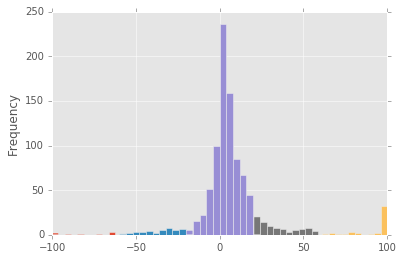

In [12]:
df.groupby(pd.cut(df['Adj EPS Surp % LF'], 5))['Adj EPS Surp % LF'].plot.hist();

In [13]:
df.groupby(pd.cut(df['GAAP EPS Surp % LF'], 5))['GAAP EPS Surp % LF'].median()

GAAP EPS Surp % LF
(-100.2, -60.0]    -86.495
(-60.0, -20.0]     -33.715
(-20.0, 20.0]        2.155
(20.0, 60.0]        33.670
(60.0, 100.0]      100.000
Name: GAAP EPS Surp % LF, dtype: float64

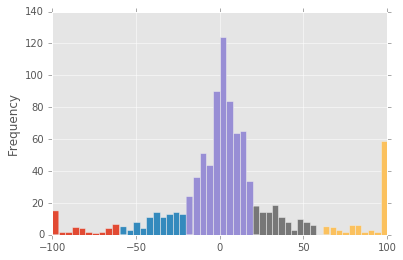

In [14]:
df.groupby(pd.cut(df['GAAP EPS Surp % LF'], 5))['GAAP EPS Surp % LF'].plot.hist();

In [15]:
# the difference between GAAP and Adjusted EPS Surprise
df['Earn Surp Diff'] = df['Adj EPS Surp % LF'] - df['GAAP EPS Surp % LF']

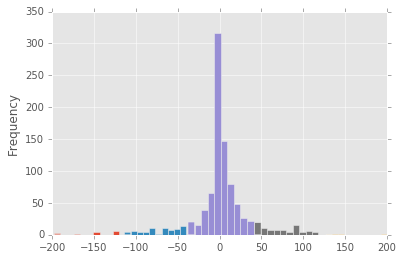

In [20]:
df.groupby(pd.cut(df['Earn Surp Diff'], 5))['Earn Surp Diff'].plot.hist();

In [21]:
df[['Earn Surp Diff']].describe()

,Earn Surp Diff
count,960.000000
mean,1.777010
std,39.164553
min,-197.370000
25%,-5.372500
50%,0.230000
75%,12.415000
max,200.000000


* What industries/sectors are more likely to use adjusted eps?
* Which industries/sectors showed the greatest "improvement" in eps once adjusted?
* Which factors would likely predict the companies with a greater propensity to rely on adjusted eps?

In [22]:
df.groupby(['GICS Ind Grp Name'])['Earn Surp Diff'].count()

GICS Ind Grp Name
Automobiles & Components                          12
Banks                                             47
Capital Goods                                     92
Commercial & Professional Services                17
Consumer Durables & Apparel                       29
Consumer Services                                 35
Diversified Financials                            54
Energy                                            52
Food & Staples Retailing                           8
Food, Beverage & Tobacco                          30
Health Care Equipment & Services                  54
Household & Personal Products                     11
Insurance                                         42
Materials                                         54
Media & Entertainment                             43
Pharmaceuticals, Biotechnology & Life Sciences    49
Real Estate                                       81
Retailing                                         39
Semiconductors & Semiconduct

In [23]:
df.loc[(df['Earn Surp Diff'] > 0)].groupby(['GICS Ind Grp Name'])['Earn Surp Diff'].count()

GICS Ind Grp Name
Automobiles & Components                          10
Banks                                             28
Capital Goods                                     49
Commercial & Professional Services                11
Consumer Durables & Apparel                       26
Consumer Services                                 17
Diversified Financials                            23
Energy                                            30
Food & Staples Retailing                           4
Food, Beverage & Tobacco                          18
Health Care Equipment & Services                  26
Household & Personal Products                      4
Insurance                                         15
Materials                                         34
Media & Entertainment                             22
Pharmaceuticals, Biotechnology & Life Sciences    27
Real Estate                                       30
Retailing                                         18
Semiconductors & Semiconduct

In [24]:
(df.loc[(df['Earn Surp Diff'] > 0)].groupby(['GICS Ind Grp Name'])['Earn Surp Diff'].count()
 / df.groupby(['GICS Ind Grp Name'])['Earn Surp Diff'].count())

GICS Ind Grp Name
Automobiles & Components                          0.833333
Banks                                             0.595745
Capital Goods                                     0.532609
Commercial & Professional Services                0.647059
Consumer Durables & Apparel                       0.896552
Consumer Services                                 0.485714
Diversified Financials                            0.425926
Energy                                            0.576923
Food & Staples Retailing                          0.500000
Food, Beverage & Tobacco                          0.600000
Health Care Equipment & Services                  0.481481
Household & Personal Products                     0.363636
Insurance                                         0.357143
Materials                                         0.629630
Media & Entertainment                             0.511628
Pharmaceuticals, Biotechnology & Life Sciences    0.551020
Real Estate                           

In [28]:
(df.loc[(df['Earn Surp Diff'] < 0)].groupby(['GICS Ind Grp Name'])['Earn Surp Diff'].count()
 / df.groupby(['GICS Ind Grp Name'])['Earn Surp Diff'].count())

GICS Ind Grp Name
Automobiles & Components                          0.166667
Banks                                             0.319149
Capital Goods                                     0.423913
Commercial & Professional Services                0.352941
Consumer Durables & Apparel                       0.068966
Consumer Services                                 0.400000
Diversified Financials                            0.537037
Energy                                            0.346154
Food & Staples Retailing                          0.375000
Food, Beverage & Tobacco                          0.366667
Health Care Equipment & Services                  0.500000
Household & Personal Products                     0.636364
Insurance                                         0.595238
Materials                                         0.370370
Media & Entertainment                             0.441860
Pharmaceuticals, Biotechnology & Life Sciences    0.387755
Real Estate                           

* What accounts for the increased use of non-GAAP earnings. Did better subsequent stock price performance encourage its use, or was executive compensation measured by non-GAAP measures?
* Which industries make greater use of non-GAAP and why?

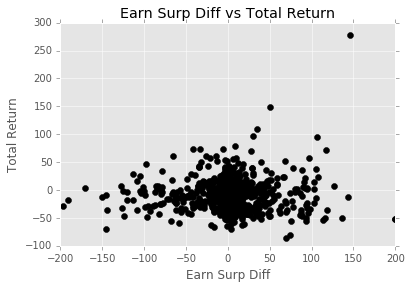

In [25]:
plt.plot(df['Earn Surp Diff'], df['Total Return:Y-1'], 'ko')
plt.xlabel('Earn Surp Diff')
plt.ylabel('Total Return')
plt.title('Earn Surp Diff vs Total Return');

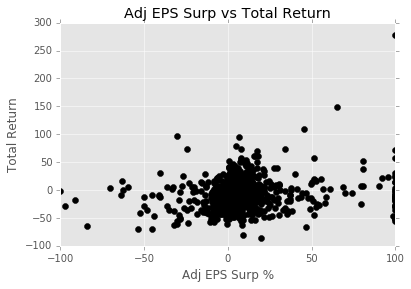

In [26]:
plt.plot(df['Adj EPS Surp % LF'], df['Total Return:Y-1'], 'ko')
plt.xlabel('Adj EPS Surp %')
plt.ylabel('Total Return')
plt.title('Adj EPS Surp vs Total Return');

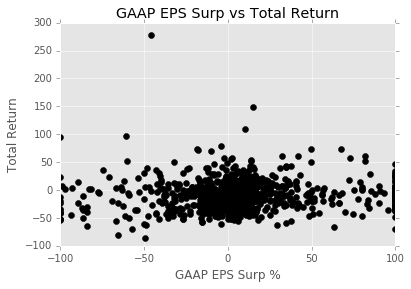

In [27]:
plt.plot(df['GAAP EPS Surp % LF'], df['Total Return:Y-1'], 'ko')
plt.xlabel('GAAP EPS Surp %')
plt.ylabel('Total Return')
plt.title('GAAP EPS Surp vs Total Return');

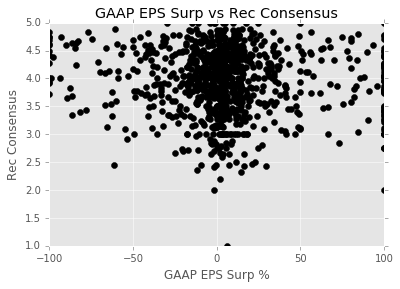

In [41]:
plt.plot(df['GAAP EPS Surp % LF'], df['Rec Consensus'], 'ko')
plt.xlabel('GAAP EPS Surp %')
plt.ylabel('Rec Consensus')
plt.title('GAAP EPS Surp vs Rec Consensus');

* Is there a relationship between earnings quality (NI-CFFO) and the use of Adj EPS